# 랭크 게임 승률 요인 분석하기


### LOL에 존재하는 여러 지표중 어떠한 요인이 승률에 가장 큰 영향을 끼치는가

## 0. 라이브러리 준비

In [68]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
## 데이터 불러오기

LOL = pd.read_csv('./games.csv')

## 1. 분석의 목적
- 승률에 가장 영향을 끼치는 요인은 무엇일까?


In [36]:
## 각 column의 데이터 타입 확인
## 이중에서 필요한 데이터들을 추출한다

LOL.dtypes

gameId          int64
creationTime    int64
gameDuration    int64
seasonId        int64
winner          int64
                ...  
t2_ban1         int64
t2_ban2         int64
t2_ban3         int64
t2_ban4         int64
t2_ban5         int64
Length: 61, dtype: object

In [37]:
## 데이터 전체 정보 얻어오기

LOL.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


## 데이터 가져오기

- 레드팀이 이긴 경기수
- 레드팀이 이겼을 경우 각 조건이 만족했는지 확인(퍼블, 첫 타워, 첫 용 etc..)

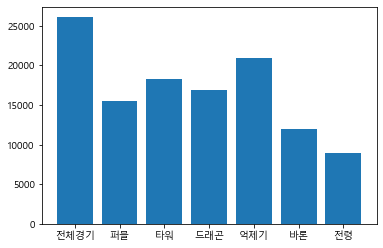

In [83]:
## 각 요인 별로 숫자를 계산해 줬습니다

red_win = len(LOL[LOL['winner'] == True])
FB = len(LOL.loc[(LOL["winner"] == 1) & (LOL['firstBlood'] == 1)])
FT = len(LOL.loc[(LOL["winner"] == 1) & (LOL['firstTower'] == 1)])
FD = len(LOL.loc[(LOL["winner"] == 1) & (LOL['firstDragon'] == 1)])
FI = len(LOL.loc[(LOL["winner"] == 1) & (LOL['firstInhibitor'] == 1)])
FBa = len(LOL.loc[(LOL["winner"] == 1) & (LOL['firstBaron'] == 1)])
FR = len(LOL.loc[(LOL["winner"] == 1) & (LOL['firstRiftHerald'] == 1)]) 

x = np.arange(7)

cause = ['전체경기', '퍼블', '타워', '드래곤', '억제기', '바론', '전령']
plt.rc('font', family='Malgun Gothic')
values = [red_win, FB, FT, FD, FI, FBa, FR]
plt.bar(x, values)
plt.xticks(x, cause)
plt.show()


- 여러요인중 승리와 가장 밀접한 요인은 먼저 억제기를 부수는 것이었습니다.
- 생각보다 퍼블은 상관관계가 적었습니다
- 바론과 전령이 상관 관계가 낮은 이유는 바론과 전령을 먹지 않고 경기를 끝내는 데이터가 많았기 때문이었습니다.

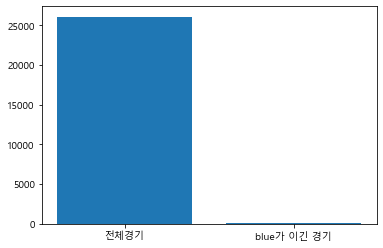

26077
58
0.22241822295509453


In [100]:
red_win = len(LOL[LOL['winner'] == True])
blue_win = len(LOL.loc[(LOL["winner"] == 2) & (LOL['firstBlood'] == 1) & (LOL['firstTower'] == 1) & (LOL['firstDragon'] == 1) & (LOL['firstInhibitor'] == 1) &  (LOL['firstBaron'] == 1) & (LOL['firstRiftHerald'] == 1)])
x = np.arange(2)
cause = ['전체경기', 'blue가 이긴 경기']
values = [red_win, blue_win]
plt.bar(x, values)
plt.xticks(x, cause)
plt.show()
print(red_win)
print(blue_win)
print(((blue_win/ red_win)  * 100))

1. 모든 요인을 다 뺏기고도 승리를 쟁취하지 못한 경우는 26077 경기중 58 경기였습니다.
2. 0.2% 사람들에게 애도를..